In [46]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors
import matplotlib.ticker as ticker

import gif

In [47]:
DOS_TEST = np.loadtxt('DOS_0.dat').view(complex)
E = np.loadtxt('E.dat')
x = np.arange(6)

EE, X = np.meshgrid(E, x)

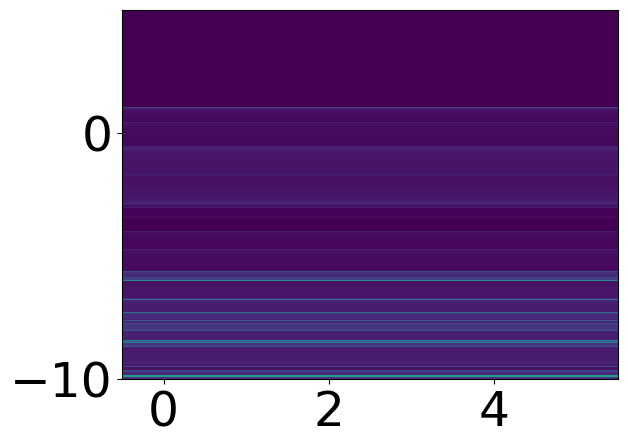

In [48]:
plt.pcolormesh(X, EE, DOS_TEST.T.real)

In [49]:
@gif.frame
def plot_standard():
    plt.pcolormesh(X, EE, DOS_TEST.T.real)

In [55]:
@gif.frame
def plot_gold(i):

    font = {'weight' : 'normal',
	'size'   : 35}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    
    DOS_TEST = np.loadtxt('DOS_' + str(i) + '.dat').view(complex)
    E = np.loadtxt('E.dat')
    EFL = np.loadtxt('EFL.dat')
    EFR = np.loadtxt('EFR.dat')
    x = np.arange(6)
    x_fl = np.linspace(-0.5, 5.55, 100)
    Efl_dotted = EFL[i+1] * np.ones((7))
    Efr_dotted = EFL[i+1] * np.ones((7))

    EE, X = np.meshgrid(E, x)
    
    plt.figure(figsize = (13,12))
    ax1 = plt.gca()
    ax1.set_xlabel('Transport Direction' + ' ' + r'$\mathbf{x}$' + ' ' + r'$ [\mathbf{u.c.}]$')
    ax1.set_ylabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.pcolormesh(X, EE, DOS_TEST.T.real, cmap = 'gist_heat_r', vmin = 0, vmax = 500)
    cbar = plt.colorbar(plot, format = ticker.FuncFormatter(fmt_1))
    cbar.ax.set_ylabel('DOS' + ' ' + r'$[\mathbf{\left( eV\cdot nm ^3 \right) ^{-1}}]$')

    ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    plt.text(0.00, EFL[i+1] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.text(4.60, EFL[i+1] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)
    plt.ylim(-5, 3)

TypeError: Dimensions of C (6, 10000) are incompatible with X (450) and/or Y (6); see help(pcolormesh)

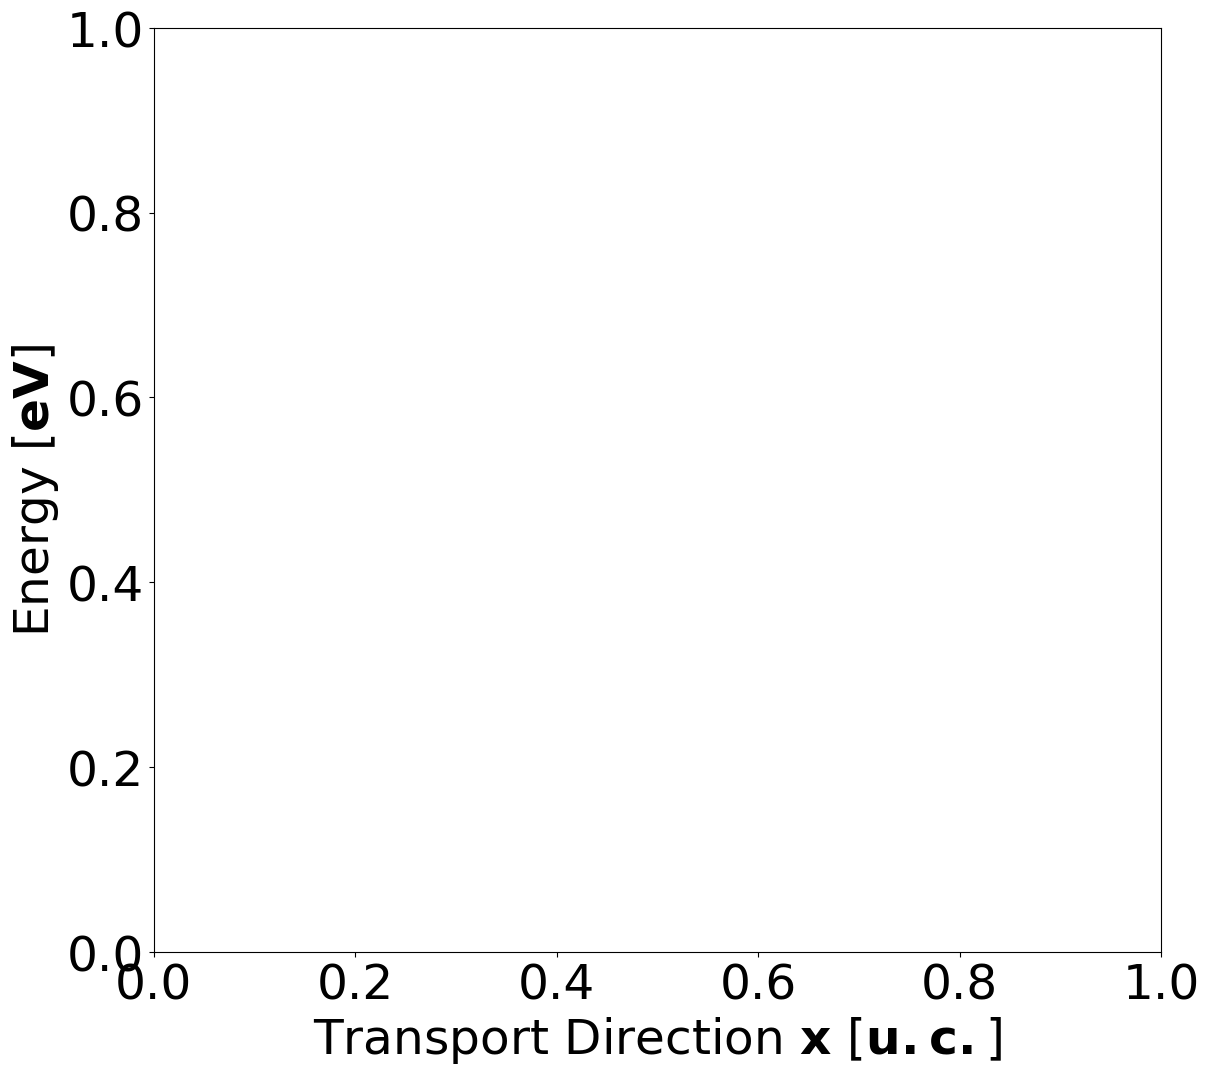

In [18]:
frames = [plot_gold(i) for i in range(10)]
gif.save(frames, 'DOS.gif', duration = 1000)

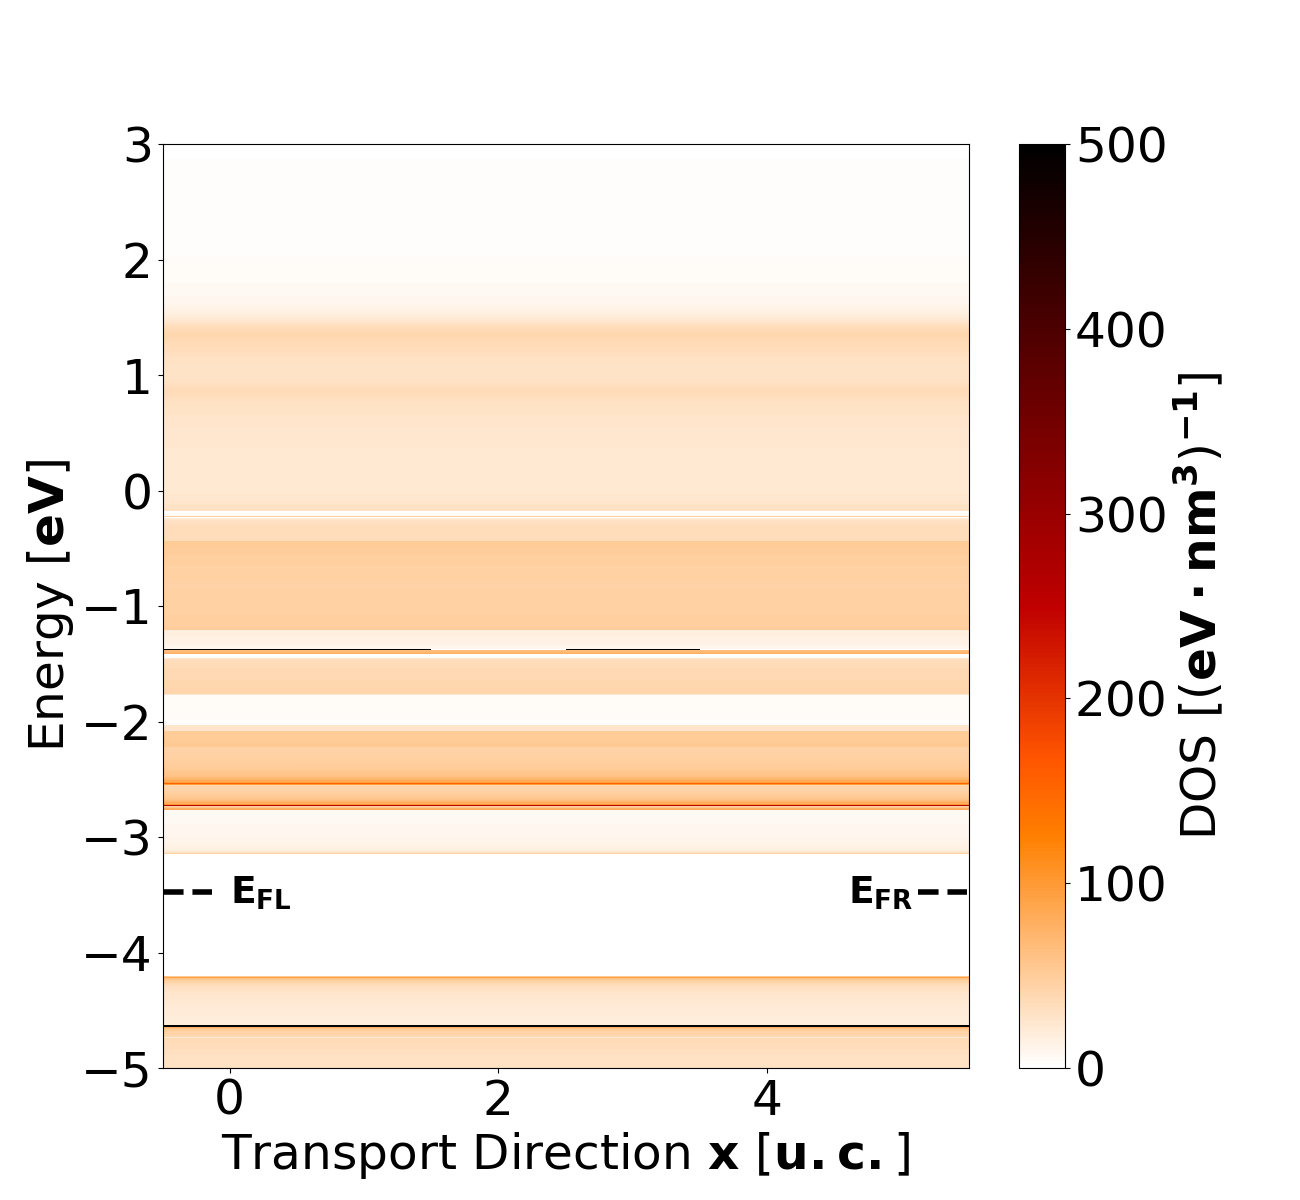

In [69]:
plot_gold(9)

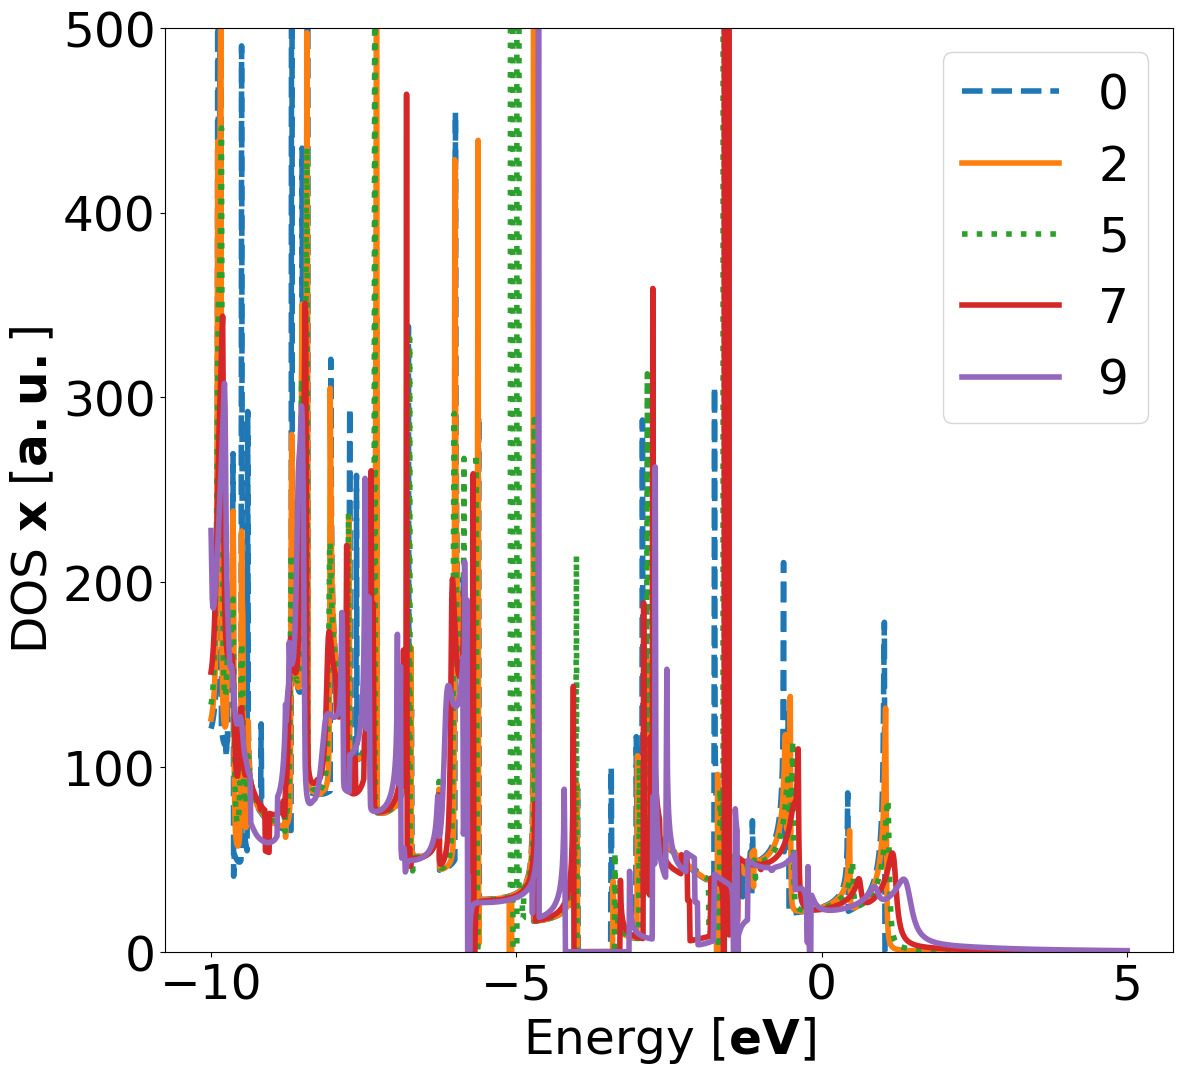

In [66]:
plt.figure(figsize = (13,12))
ax1 = plt.gca()
ax1.set_ylabel('DOS' + ' ' + r'$\mathbf{x}$' + ' ' + r'$ [\mathbf{a.u.}]$')
ax1.set_xlabel('Energy' + ' '  + r'$[\mathbf{eV}]$')

DOS_TEST = np.loadtxt('DOS_' + str(0) + '.dat').view(complex)

plt.plot(E, DOS_TEST[:, 0], label = '0', linewidth = '4', linestyle = 'dashed')
#DOS_TEST = np.loadtxt('DOS_' + str(1) + '.dat').view(complex)
#plt.plot(DOS_TEST[:, 1])
DOS_TEST = np.loadtxt('DOS_' + str(1) + '.dat').view(complex)
plt.plot(E, DOS_TEST[:, 3], label = '2', linewidth = '4')

DOS_TEST = np.loadtxt('DOS_' + str(2) + '.dat').view(complex)
plt.plot(E, DOS_TEST[:, 5],    label = '5', linewidth = '4', linestyle = 'dotted')

DOS_TEST = np.loadtxt('DOS_' + str(4) + '.dat').view(complex)
plt.plot(E, DOS_TEST[:, 5],   label = '7', linewidth = '4', linestyle = 'solid')

DOS_TEST = np.loadtxt('DOS_' + str(9) + '.dat').view(complex)
plt.plot(E, DOS_TEST[:, 5],   label = '9', linewidth = '4', linestyle = 'solid')

plt.ylim(0, 500)
plt.legend()
plt.savefig('dos.png', dpi= 150)

In [72]:
def plot_line(i):

    font = {'weight' : 'normal',
	'size'   : 35}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    DOS_ZERO = np.loadtxt('DOS_0.dat').view(complex)
    DOS_TEST = np.loadtxt('DOS_' + str(i) + '.dat').view(complex)
    
    E = np.loadtxt('E.dat')
    EFL = np.loadtxt('EFL.dat')
    EFR = np.loadtxt('EFR.dat')
    x = np.arange(6)
    x_fl = np.linspace(-0.5, 9.55, 100)
    #Efl_dotted = EFL[i] * np.ones((7))
    #Efr_dotted = EFR[i] * np.ones((7))
    shift = EFL[i] - EFL[0]
    
    plt.figure(figsize = (15,12))
    ax1 = plt.gca()
    ax1.set_ylabel('DOS' + ' ' + r'$[\mathbf{\left( eV\cdot nm ^3 \right) ^{-1}}]$')
    ax1.set_xlabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.plot(E, DOS_ZERO.T.real[0,:], linewidth = 4, label = "Ballistic")
    plt.plot(E-shift, DOS_TEST.T.real[0,:], linewidth = 4, label = "SC-GW at iteration " + str(i))
    #y_lim = np.max(DOS_TEST.T.real[0,:])
    y_lim = 250
    NE = E.shape[0]

    plt.plot(EFL[0]*np.ones((100,)), np.linspace(0, y_lim, 100), color = 'black', linestyle = 'dashed', linewidth = '4', label = 'Fermi Level')
    plt.ylim(0, y_lim + 2)
    plt.xlim(-5, -3)
    #plt.text(EFL[0] - 1 , 4/5 * y_lim , r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.legend()
    plt.show()

    #ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    #ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    #plt.text(0.00+0.20, EFL[i] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    #plt.text(8.55-0.50, EFR[i] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)


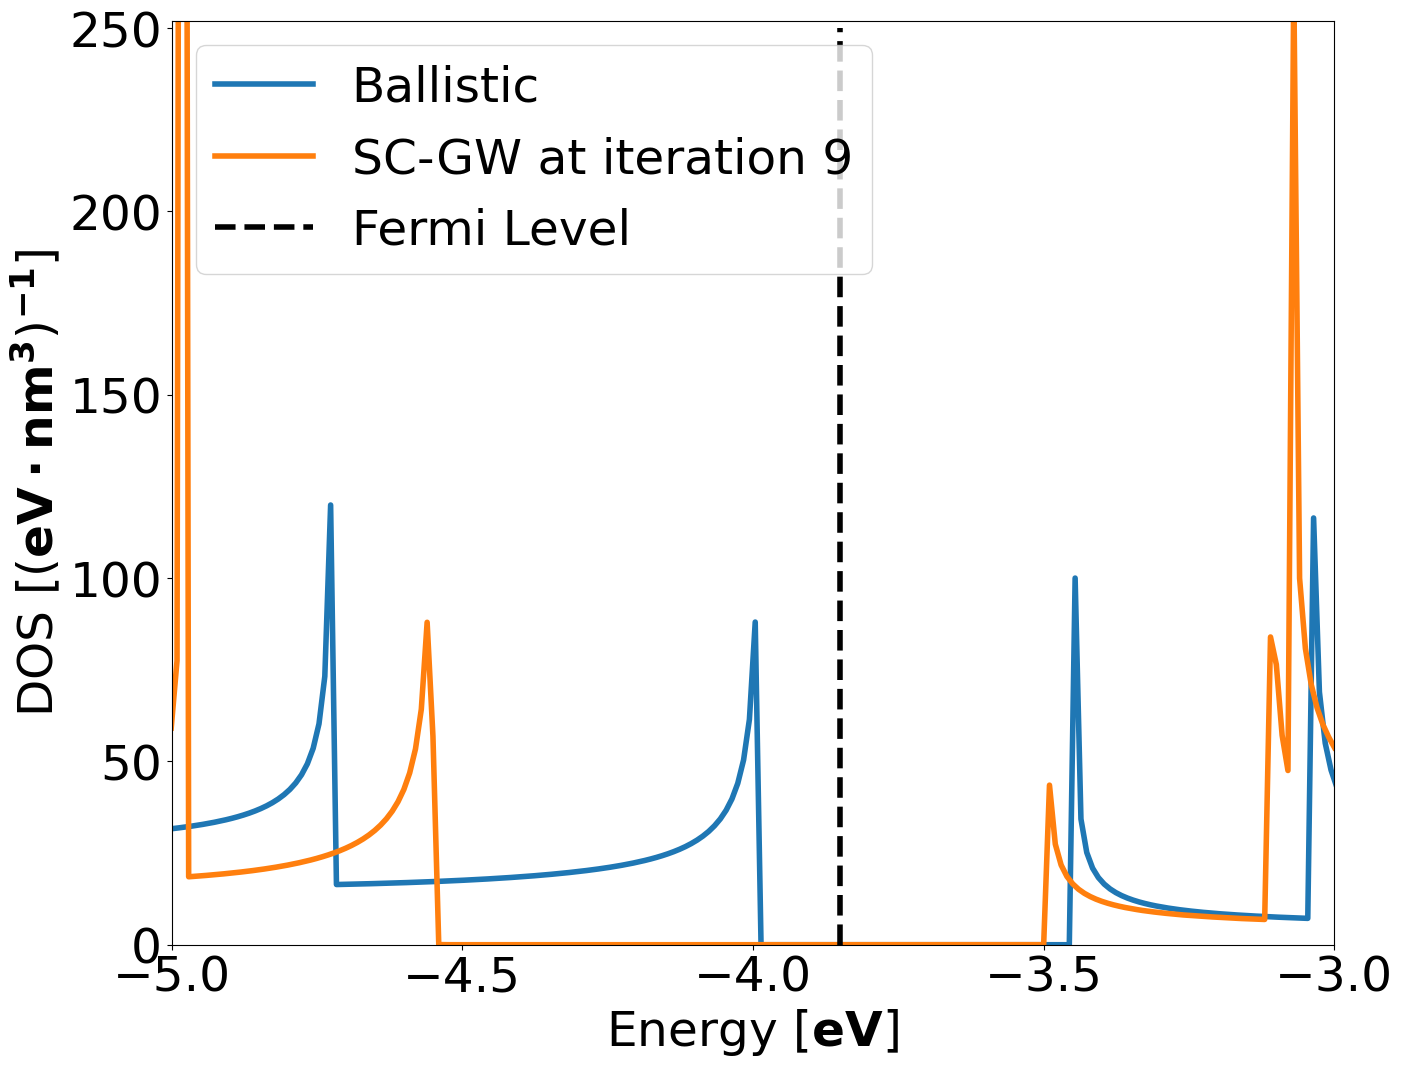

In [73]:
plot_line(9)